In [1]:
from init_nb import init_notebook
config = init_notebook()

from pathlib import Path
import matplotlib.pyplot as plt
import joblib
import numpy as np
from scipy.io import savemat

In [2]:
from scipy.io import loadmat
import pandas as pd
matpath = Path("/homes_unix/jlegrand/data/Memento/output/connectivity/atlas-gillig-regions_no-gsr_matlab")

GROUP = "all_subs"
matrices = loadmat(matpath / f"{GROUP}.mat")["matrices"]
df = pd.read_csv(matpath / f"balanced_{GROUP}.csv", index_col=0)

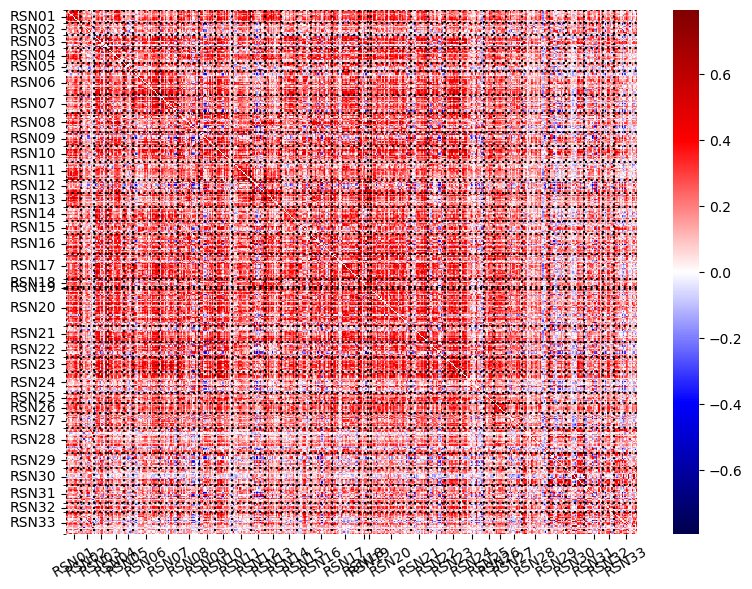

In [6]:
from bold_dementia.connectivity import plot_matrix, Atlas, plot_ordered_matrix
atlas = Atlas.from_name("gillig-regions", False)
plot_matrix(matrices[4], atlas)
plt.show()

In [88]:
from bold_dementia.connectivity import group_groupby

res = group_groupby(matrices, atlas)

KeyboardInterrupt: 

In [ ]:
grouped_mat = res[0]

In [ ]:
gmn = [gm.values for gm in grouped_mat]

In [ ]:
# Exporting intranetwork connectivity
export_path = matpath / f"intranet_{GROUP}"
gmn = np.stack(gmn, axis=0)
exportp= joblib.dump(gmn, str(export_path) + ".joblib")
savemat(str(export_path) + ".mat", {"matrices": gmn}, appendmat=False) # This is stupid

## Time series

In [3]:
ts = loadmat(matpath / f"{GROUP}_series_ub.mat")["matrices"][0]
ts[0].shape

(250, 439)

In [16]:
# Select time series from cortex only
rg = pd.DataFrame(atlas)
# Color for each roi in the nifti file is its index + 1 with zero based indexing
croi = rg[rg.tissue == "cortex"].voxel_value
cortex_ts = [t[:, croi] for t in list(ts)]
covs = [np.cov(cts.T) for cts in cortex_ts]

In [17]:
scovs.shape

(2924, 31, 31)

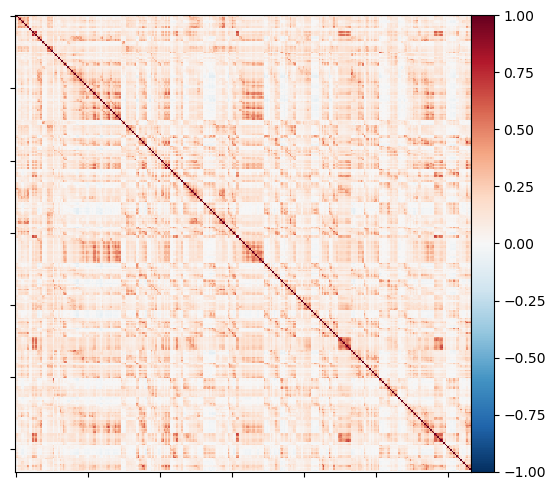

In [18]:
from nilearn import plotting
scovs = np.stack(covs, axis=0)
plotting.plot_matrix(scovs.mean(axis=0), vmin=-1, vmax=1)

In [19]:
savemat(matpath / "cortex_time_series.mat", {"series": cortex_ts}, appendmat=False) # This is stupid
rg.loc[croi - 1, ["labels", "networks", "tissue", "Cognitive label (consensus)"]].reset_index(drop=True).to_csv(matpath / "cortex_regions.csv")

In [20]:
ts = loadmat(matpath / "cortex_time_series.mat")["series"][0]

In [21]:
pd.read_csv(matpath / "cortex_regions.csv", index_col=0)

,labels,networks,tissue,Cognitive label (consensus)
0,M-FPN-I_001,RSN01,cortex,n.s.
1,M-FPN-I_002,RSN01,cortex,n.s.
2,M-FPN-I_004,RSN01,cortex,n.s.
3,M-FPN-I_006,RSN01,cortex,n.s.
4,M-FPN-I_007,RSN01,cortex,n.s.
...,...,...,...,...
311,L-FPN-VIII_001,RSN25,cortex,reasoning
312,L-FPN-VIII_002,RSN25,cortex,reasoning
313,L-FPN-VIII_006,RSN25,cortex,reasoning
314,L-FPN-VIII_007,RSN25,cortex,reasoning


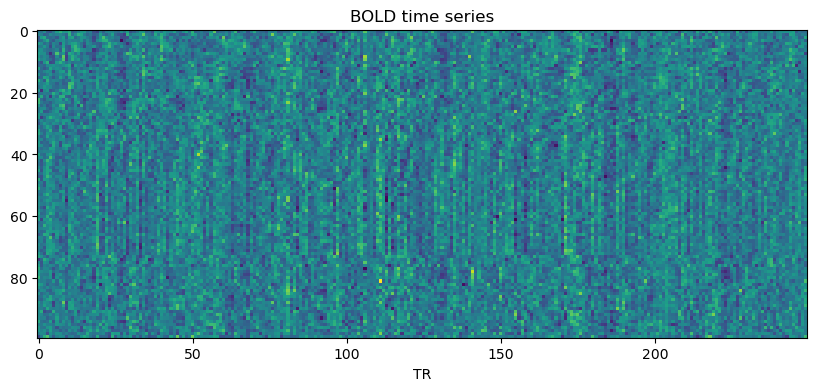

In [22]:
plt.subplots(figsize=(15, 4))
plt.imshow(ts[200][:, :100].T)
plt.xlabel("TR")
plt.title("BOLD time series")
plt.show()

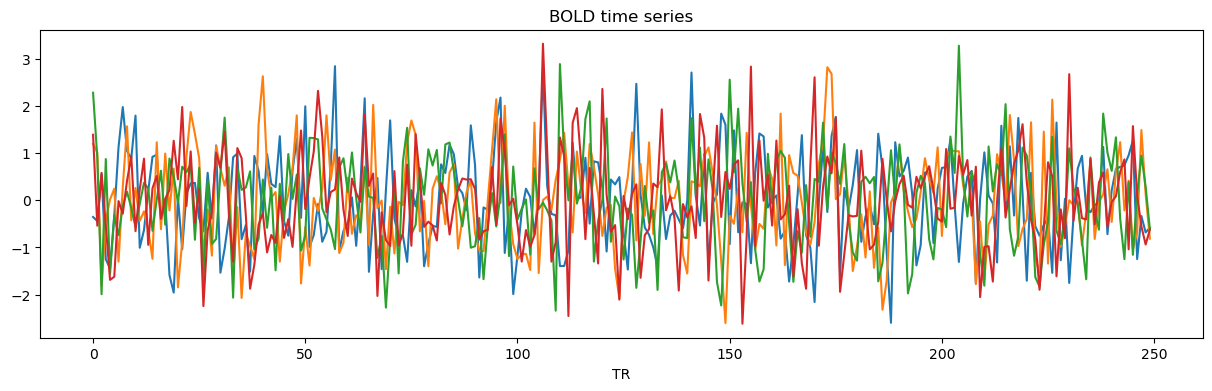

In [23]:
plt.subplots(figsize=(15, 4))
plt.plot(ts[200][:, ::100])
plt.xlabel("TR")
plt.title("BOLD time series")
plt.show()